# Classifying Iris into its speicies Using LogReg, KNN,DTree, RndmForest,SVC, GuassianNB (Naive Bayes)
    Author:        Adeyemi Adedoyin Simeon
    Date:          May 7, 2019
    Last Modified: September 16, 2019
    Location:      Offa, Kwara State.
    Version:       1.1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
from sklearn.datasets import load_iris

In [4]:
data = load_iris()

In [5]:
ds = data.data

In [6]:
def remove_unit(txt):
    a = txt.split(' ')
    a.pop()
    return ' '.join(a)

In [7]:
labels = list(map(remove_unit,data.feature_names))

In [8]:
df = pd.DataFrame(data=ds,columns=labels)

In [9]:
df.head(5)

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
df['specie'] = data.target

In [11]:
df.head(5)

,sepal length,sepal width,petal length,petal width,specie
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
df['specie name'] = df['specie'].apply(lambda x: data.target_names[x])

In [13]:
df.head(5)

,sepal length,sepal width,petal length,petal width,specie,specie name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
sepal length    150 non-null float64
sepal width     150 non-null float64
petal length    150 non-null float64
petal width     150 non-null float64
specie          150 non-null int32
specie name     150 non-null object
dtypes: float64(4), int32(1), object(1)
memory usage: 6.5+ KB


In [15]:
X = df.drop(labels=['specie','specie name'],axis=1)
y = df['specie']

In [16]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

## Preparing the models

In [17]:
models = []
models.append(['LR',LogisticRegression()])
models.append(['KNN',KNeighborsClassifier()])
models.append(['DT',DecisionTreeClassifier()])
models.append(['NB',GaussianNB()])
models.append(['SVM',SVC()])

In [18]:
seed = 7

## Evaluating the models

In [19]:
results = []
names = []
for name,model in models:
    kfold = model_selection.KFold(n_splits=10,random_state=seed) #10-Fold
    cv_results = model_selection.cross_val_score(estimator=model,X=X,y=y, scoring='accuracy',cv=kfold)
    results.append(cv_results.mean())
    names.append(name)
    print('%s: %f (%f)' %(name, cv_results.mean(), cv_results.std()))

LR: 0.880000 (0.148474)
KNN: 0.933333 (0.084327)
DT: 0.926667 (0.091652)
NB: 0.946667 (0.058119)
SVM: 0.953333 (0.052068)


In [20]:
df2 = pd.DataFrame(list(zip(names,results)),columns=['Estimator','Accuracy Score'])

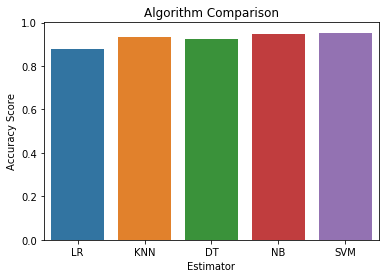

In [21]:
plt.title('Algorithm Comparison')
sns.barplot(x='Estimator',y='Accuracy Score',data=df2)

In [22]:
df2

,Estimator,Accuracy Score
0,LR,0.880000
1,KNN,0.933333
2,DT,0.926667
3,NB,0.946667
4,SVM,0.953333


In [25]:
best_model = [(names[i] + ' = ' + str(max(results))) for i in range(len(results)) if results[i] == max(results)]

In [26]:
best_model

['SVM = 0.9533333333333334']